In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:
df = pd.read_csv('/SQL Projects/Project 11 - Europe Sales Records/Europe Sales Records.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/SQL Projects/Project 11 - Europe Sales Records/Europe Sales Records.csv'

In [ ]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
1,Europe,Bosnia and Herzegovina,Clothes,Online,M,10/14/2013,919133651,11/4/2013,927,109.28,35.84,101302.56,33223.68,68078.88
2,Europe,Austria,Cereal,Offline,C,8/13/2014,987410676,9/6/2014,5616,205.70,117.11,1155211.20,657689.76,497521.44
3,Europe,Bulgaria,Office Supplies,Online,L,10/31/2010,672330081,11/29/2010,6266,651.21,524.96,4080481.86,3289399.36,791082.50
4,Europe,Estonia,Fruits,Online,L,9/28/2016,579463422,11/1/2016,4958,9.33,6.92,46258.14,34309.36,11948.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,Europe,Norway,Personal Care,Offline,M,1/14/2014,634033286,1/15/2014,3394,81.73,56.67,277391.62,192337.98,85053.64
1326,Europe,Ukraine,Cereal,Offline,L,4/14/2014,559183347,5/21/2014,3633,205.70,117.11,747308.10,425460.63,321847.47
1327,Europe,Armenia,Meat,Offline,M,11/9/2015,781416594,12/23/2015,7390,421.89,364.69,3117767.10,2695059.10,422708.00
1328,Europe,Denmark,Clothes,Offline,H,5/9/2012,713357150,6/3/2012,7088,109.28,35.84,774576.64,254033.92,520542.72


In [ ]:
user_df = df[['Order ID', 'Country', 'Item Type', 'Units Sold', 'Sales Channel']]

In [ ]:
user_df

,Order ID,Country,Item Type,Units Sold,Sales Channel
0,478051030,Czech Republic,Beverages,4778,Offline
1,919133651,Bosnia and Herzegovina,Clothes,927,Online
2,987410676,Austria,Cereal,5616,Offline
3,672330081,Bulgaria,Office Supplies,6266,Online
4,579463422,Estonia,Fruits,4958,Online
...,...,...,...,...,...
1325,634033286,Norway,Personal Care,3394,Offline
1326,559183347,Ukraine,Cereal,3633,Offline
1327,781416594,Armenia,Meat,7390,Offline
1328,713357150,Denmark,Clothes,7088,Offline


In [ ]:
user_df = user_df.rename(columns={'Order ID': 'order_id', 'Country': 'country', 'Item Type': 'item_type', 'Units Sold': 'quantity', 'Sales Channel': 'sales_chanel'})

In [ ]:
user_df

,order_id,country,item_type,quantity,sales_chanel
0,478051030,Czech Republic,Beverages,4778,Offline
1,919133651,Bosnia and Herzegovina,Clothes,927,Online
2,987410676,Austria,Cereal,5616,Offline
3,672330081,Bulgaria,Office Supplies,6266,Online
4,579463422,Estonia,Fruits,4958,Online
...,...,...,...,...,...
1325,634033286,Norway,Personal Care,3394,Offline
1326,559183347,Ukraine,Cereal,3633,Offline
1327,781416594,Armenia,Meat,7390,Offline
1328,713357150,Denmark,Clothes,7088,Offline


In [ ]:
# Общее количество проданых товаров по странам офлайн

user_purchases_offline = user_df.groupby(['country', 'sales_chanel'], as_index=False) \
    .agg({'quantity': 'sum'}) \
    .rename(columns={'quantity': 'purchases'}) \
    .sort_values('purchases', ascending=False) \
    .query('sales_chanel == "Offline"')

In [ ]:
# Общее количество проданых товаров по странам онлайн

user_purchases_online = user_df.groupby(['country', 'sales_chanel'], as_index=False) \
    .agg({'quantity': 'sum'}) \
    .rename(columns={'quantity': 'purchases'}) \
    .sort_values('purchases', ascending=False) \
    .query('sales_chanel == "Online"')

In [ ]:
user_purchases_offline

,country,sales_chanel,purchases
76,San Marino,Offline,116488
54,Macedonia,Offline,107815
78,Serbia,Offline,100854
74,Russia,Offline,99405
66,Norway,Offline,97866
32,Germany,Offline,94085
72,Romania,Offline,93140
42,Italy,Offline,91316
44,Kosovo,Offline,90750
6,Austria,Offline,90296


In [ ]:
user_purchases_online

,country,sales_chanel,purchases
3,Andorra,Online,110638
35,Greece,Online,100799
19,Cyprus,Online,99560
55,Macedonia,Online,95263
57,Malta,Online,93192
9,Belarus,Online,91701
21,Czech Republic,Online,89803
83,Slovenia,Online,88943
45,Kosovo,Online,86839
91,Ukraine,Online,85905


In [ ]:
user_purchases_offline.purchases.median()

67538.5

In [ ]:
user_purchases_online.purchases.median()

69084.5

In [ ]:
user_purchases_offline.describe()

,purchases
count,48.000000
mean,69295.020833
std,21158.663976
min,27097.000000
25%,53577.500000
50%,67538.500000
75%,83021.250000
max,116488.000000


In [ ]:
user_purchases_online.describe()

,purchases
count,48.000000
mean,67836.687500
std,19560.851243
min,26029.000000
25%,54335.500000
50%,69084.500000
75%,79579.250000
max,110638.000000


In [ ]:
# Общее количество проданых товаров в каждой стране (и офлайн и онлайн)

user_purchases = user_df.groupby('country', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .rename(columns={'quantity': 'purchases'}) \
    .sort_values('purchases', ascending=False)

In [ ]:
user_purchases

,country,purchases
27,Macedonia,203078
38,San Marino,192228
1,Andorra,185686
22,Kosovo,177589
17,Greece,176859
28,Malta,173641
39,Serbia,170369
36,Romania,166882
37,Russia,165954
45,Ukraine,164577


In [ ]:
user_purchases.describe()

,purchases
count,48.000000
mean,137131.708333
std,30816.049779
min,53423.000000
25%,119324.750000
50%,137653.000000
75%,156554.500000
max,203078.000000


In [ ]:
# Количество проданых товаров каждой категоии в каждой стране Онлайн

fav_item_online = user_df.groupby(['country', 'item_type', 'sales_chanel'], as_index=False) \
    .agg({'quantity': 'sum'}) \
    .query('sales_chanel == "Online"') \
    .sort_values('quantity', ascending=False)

In [ ]:
fav_item_online

,country,item_type,sales_chanel,quantity
69,Belarus,Beverages,Online,33173
565,Poland,Cereal,Online,28450
373,Kosovo,Fruits,Online,27993
761,Ukraine,Cosmetics,Online,27473
587,Portugal,Meat,Online,26592
...,...,...,...,...
362,Italy,Personal Care,Online,222
408,Liechtenstein,Cosmetics,Online,138
322,Iceland,Fruits,Online,112
573,Poland,Office Supplies,Online,85


In [ ]:
# Количество проданых товаров каждой категоии в каждой стране Офлайн

fav_item_offline = user_df.groupby(['country', 'item_type', 'sales_chanel'], as_index=False) \
    .agg({'quantity': 'sum'}) \
    .query('sales_chanel == "Offline"') \
    .sort_values('quantity', ascending=False)

In [ ]:
fav_item_offline

,country,item_type,sales_chanel,quantity
454,Macedonia,Beverages,Offline,39284
471,Malta,Baby Food,Offline,30499
347,Italy,Baby Food,Offline,26557
616,Russia,Clothes,Offline,25606
5,Albania,Cosmetics,Offline,25412
...,...,...,...,...
241,France,Meat,Offline,167
676,Slovakia,Meat,Offline,166
749,Switzerland,Office Supplies,Offline,150
735,Sweden,Vegetables,Offline,101


In [ ]:
user_df.item_type.unique()

array(['Beverages', 'Clothes', 'Cereal', 'Office Supplies', 'Fruits',
       'Vegetables', 'Meat', 'Snacks', 'Baby Food', 'Household',
       'Cosmetics', 'Personal Care'], dtype=object)

In [ ]:
# Количество чаще всего покупаемых категорий каждой страны (и офлайн и онлайн)

fav_category_purch = user_df.groupby(['country', 'item_type'], as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) \
    .groupby('country') \
    .head(1) \
    .rename(columns={'item_type': 'favourite_category', 'quantity': 'purchases_fav_category'})

In [ ]:
fav_category_purch

,country,favourite_category,purchases_fav_category
192,Hungary,Baby Food,40479
291,Macedonia,Beverages,39284
431,Serbia,Vegetables,38850
366,Poland,Cereal,37721
245,Kosovo,Vegetables,35199
305,Malta,Cosmetics,34133
224,Italy,Baby Food,34015
114,Czech Republic,Household,33604
440,Slovakia,Office Supplies,33207
43,Belarus,Beverages,33173


In [ ]:
# Количество уникальных категорий товаров, купленых в каждой стране (офлайн)

users_unique_item_offline = user_df.groupby(['country', 'sales_chanel'], as_index=False) \
    .agg({'item_type': pd.Series.nunique}) \
    .query('sales_chanel == "Offline"') \
    .rename(columns={'item_type': 'unique_category'}) \
    .sort_values('unique_category')

In [ ]:
users_unique_item_offline

,country,sales_chanel,unique_category
92,United Kingdom,Offline,4
60,Monaco,Offline,4
48,Liechtenstein,Offline,5
30,Georgia,Offline,5
0,Albania,Offline,6
8,Belarus,Offline,6
16,Croatia,Offline,6
26,Finland,Offline,6
58,Moldova,Offline,7
38,Iceland,Offline,7


In [ ]:
# Количество уникальных категорий товаров, купленых в каждой стране (онлайн)

users_unique_item_online = user_df.groupby(['country', 'sales_chanel'], as_index=False) \
    .agg({'item_type': pd.Series.nunique}) \
    .query('sales_chanel == "Online"') \
    .rename(columns={'item_type': 'unique_category'}) \
    .sort_values('unique_category')

In [ ]:
users_unique_item_online

,country,sales_chanel,unique_category
17,Croatia,Online,5
37,Hungary,Online,5
67,Norway,Online,6
65,Netherlands,Online,6
11,Belgium,Online,6
61,Monaco,Online,6
1,Albania,Online,7
89,Switzerland,Online,7
71,Portugal,Online,7
63,Montenegro,Online,7


In [ ]:
# Количество уникальных категорий товаров, купленых в каждой стране (и офлайн и онлайн)

users_unique_category = user_df.groupby('country', as_index=False) \
    .agg({'item_type': pd.Series.nunique}) \
    .rename(columns={'item_type': 'unique_category'}) \
    .sort_values('unique_category')

In [ ]:
users_unique_category

,country,unique_category
15,Georgia,8
0,Albania,9
32,Netherlands,9
30,Monaco,9
43,Sweden,9
8,Croatia,9
31,Montenegro,10
25,Lithuania,10
35,Portugal,10
14,France,10


In [ ]:
# Лояльность к товарам в каждой стране (+ соеденить три таблицы)

loyalty_df = user_purchases \
    .merge(users_unique_category, on='country') \
    .merge(fav_category_purch, on='country') \
    .sort_values('purchases_fav_category', ascending=False)

In [ ]:
loyalty_df

,country,purchases,unique_category,favourite_category,purchases_fav_category
15,Hungary,152242,10,Baby Food,40479
0,Macedonia,203078,12,Beverages,39284
6,Serbia,170369,11,Vegetables,38850
34,Poland,122650,11,Cereal,37721
3,Kosovo,177589,11,Vegetables,35199
5,Malta,173641,11,Cosmetics,34133
11,Italy,156781,11,Baby Food,34015
21,Czech Republic,142446,12,Household,33604
28,Slovakia,131540,12,Office Supplies,33207
14,Belarus,153432,10,Beverages,33173


In [ ]:
# Лояльность к товарам в каждой стране Офлайн (+ соеденить три таблицы)

loyalty_offline_df = user_purchases_offline \
    .merge(users_unique_item_offline, on=['country', 'sales_chanel']) \
    .merge(fav_item_offline, on=['country', 'sales_chanel'])
   # .sort_values('purchases_fav_category', ascending=False)

In [ ]:
loyalty_offline_df

,country,sales_chanel,purchases,unique_category,item_type,quantity
0,San Marino,Offline,116488,12,Vegetables,19611
1,San Marino,Offline,116488,12,Office Supplies,19310
2,San Marino,Offline,116488,12,Beverages,14681
3,San Marino,Offline,116488,12,Snacks,11303
4,San Marino,Offline,116488,12,Household,9985
...,...,...,...,...,...,...
395,Croatia,Offline,27097,6,Baby Food,6786
396,Croatia,Offline,27097,6,Cosmetics,6267
397,Croatia,Offline,27097,6,Personal Care,3325
398,Croatia,Offline,27097,6,Office Supplies,2908


In [ ]:
loyalty_df

,country,purchases,unique_category,favourite_category,purchases_fav_category,loyalty_score
15,Hungary,152242,10,Baby Food,40479,26.59
0,Macedonia,203078,12,Beverages,39284,19.34
6,Serbia,170369,11,Vegetables,38850,22.80
34,Poland,122650,11,Cereal,37721,30.75
3,Kosovo,177589,11,Vegetables,35199,19.82
5,Malta,173641,11,Cosmetics,34133,19.66
11,Italy,156781,11,Baby Food,34015,21.70
21,Czech Republic,142446,12,Household,33604,23.59
28,Slovakia,131540,12,Office Supplies,33207,25.24
14,Belarus,153432,10,Beverages,33173,21.62


In [ ]:
# Процент предпочитаемого товара по отношению к другим товарам

loyalty_df['loyalty_score'] = round((loyalty_df.purchases_fav_category / loyalty_df.purchases * 100), 2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9668\711974570.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(loyalty_df.loyalty_score, kde=False)


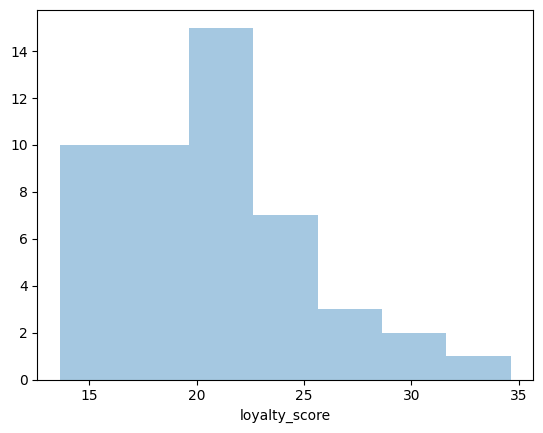

In [ ]:
ax = sns.distplot(loyalty_df.loyalty_score, kde=False)

In [ ]:
# Количество покупок каждого товара + среднее значение

product_loyalty = loyalty_df.groupby('favourite_category', as_index=False) \
    .agg({'loyalty_score': 'median', 'country': 'count'}) \
    .rename(columns={'loyalty_score': 'avg_score', 'country': 'count_product'}) \
    .sort_values('count_product', ascending=False)

In [ ]:
product_loyalty

,favourite_category,avg_score,count_product
0,Baby Food,21.700,7
5,Fruits,16.460,7
8,Office Supplies,17.990,6
11,Vegetables,17.915,6
1,Beverages,21.620,5
3,Clothes,20.875,4
4,Cosmetics,19.660,3
7,Meat,21.230,3
6,Household,22.415,2
9,Personal Care,25.460,2


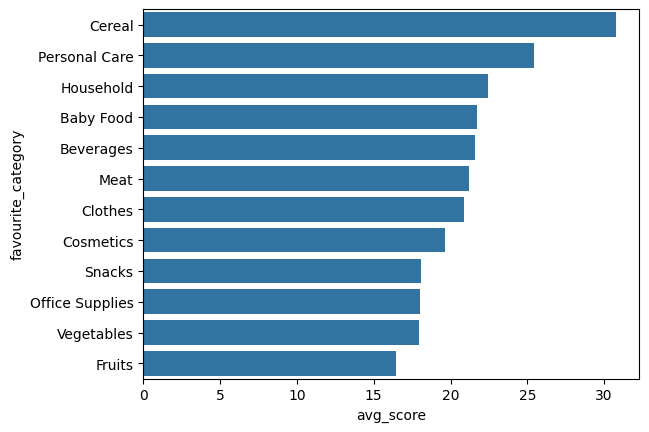

In [ ]:
ax = sns.barplot(x='avg_score', y='favourite_category', data=product_loyalty)

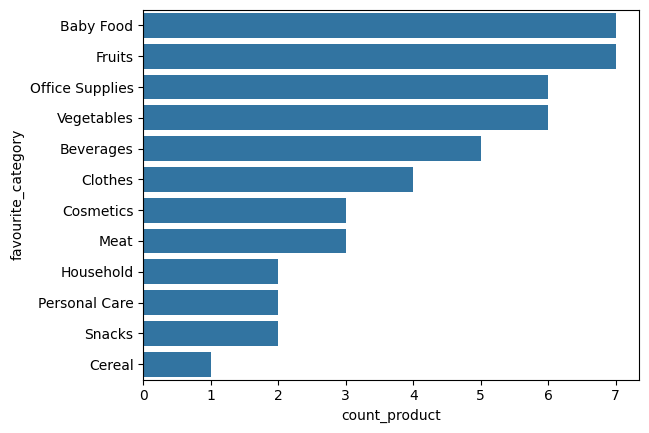

In [ ]:
ax = sns.barplot(x='count_product', y='favourite_category', data=product_loyalty)